**TwitterAPI**


In [31]:
# paquetes
import csv # para escribir .csv
import pandas as pd # para manejo de estructuras pandas DataFrame
import os  # para leer .csv
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv(os.path.join("santander_chile_estado_bci.csv"))     
df.fillna(0).head() 

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount
0,Ceci (Winthertur),@Ceci83437135,2021-01-18T15:00:34.000Z,"Excelente, no lo sabia, pero no lo publicitan ...",0.0,0.0,0.0
1,Leonardo,@tijercat,2021-01-18T13:24:03.000Z,"Sres \n@BancoEstado\n como no tener ""Tino"", al...",0.0,0.0,0.0
2,“ Carola Correa“ #YoVotoRechazo,@carolincorreav,2021-01-15T15:54:49.000Z,"Replying to \n@BancoEstadoChao #bancoestado, n...",0.0,0.0,0.0
3,HCN,@DelCantoNunez,2021-01-13T22:34:42.000Z,"Muy cierto, algunos compatriotas dejan fluir s...",0.0,0.0,0.0
4,Urián Cádiz,@urian_cadiz,2021-01-12T18:03:06.000Z,Utilidad pública.... Ninguna institución banca...,0.0,0.0,1.0


In [3]:
df["TweetText"] = df["TweetText"].str.lower()
df["BancoEstado"]= 0
df["BancoChile"]= 0
df["Santander"]= 0
df["BCI"]= 0

df["BancoEstado"] = df["TweetText"].str.find("bancoestado")
df["Santander"] = df["TweetText"].str.find("santander")
df["BancoChile"] = df["TweetText"].str.find("bancochile")
df["BCI"] = df["TweetText"].str.find("bci")

In [4]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [42]:
df["Subjectivity" ] = df["TweetText"].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df["Polarity" ] = df["TweetText"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [6]:
df.tail()

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,BancoEstado,BancoChile,Santander,BCI,Subjectivity,Polarity
6332,Max y Miliano Martin,@maxymiliano,2009-11-03T18:11:57.000Z,pagando un nic ... el webpay no me llevó al ba...,NaN,NaN,NaN,-1,119,-1,-1,0.4,-0.50
6333,Ale Silberstein,@alesilberstein,2009-10-31T17:00:42.000Z,rt \n@juanpablotapia\n: sabía usté que el #ban...,NaN,NaN,NaN,-1,41,-1,-1,0.0,0.00
6334,nodalomismo,@paulisalazar,2009-10-26T15:57:41.000Z,nada más enredado que el #bancochile para abri...,NaN,NaN,NaN,-1,26,-1,-1,1.0,-0.25
6335,Neotronics SPA,@neotronicscl,2009-10-13T19:51:58.000Z,peleando con #bancochile.... arghhh!,NaN,NaN,NaN,-1,14,-1,-1,0.0,0.00
6336,Juan Paulo Madriaza,@mad_uxd,2009-09-18T15:24:29.000Z,cachando que cambiaron el sistema de pago onli...,NaN,NaN,NaN,-1,67,-1,-1,0.0,0.00


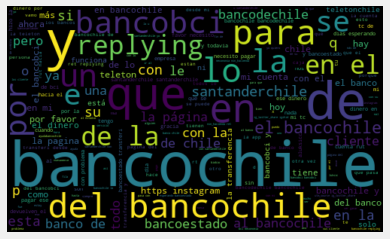

In [7]:
# wordcloud
allWords = " ".join( [tweets for tweets in df["TweetText"]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [8]:
def getAnalysis(score):
    if score < 0 :
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [9]:
df["Analysis"] = df["Polarity"].apply(getAnalysis)

In [10]:
df.head()

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,BancoEstado,BancoChile,Santander,BCI,Subjectivity,Polarity,Analysis
0,Ceci (Winthertur),@Ceci83437135,2021-01-18T15:00:34.000Z,"excelente, no lo sabia, pero no lo publicitan ...",NaN,NaN,NaN,-1,59,-1,53,0.0,0.0,0
1,Leonardo,@tijercat,2021-01-18T13:24:03.000Z,"sres \n@bancoestado\n como no tener ""tino"", al...",NaN,NaN,NaN,7,-1,152,-1,0.0,0.0,0
2,“ Carola Correa“ #YoVotoRechazo,@carolincorreav,2021-01-15T15:54:49.000Z,"replying to \n@bancoestadochao #bancoestado, n...",NaN,NaN,NaN,14,-1,-1,-1,0.0,0.0,0
3,HCN,@DelCantoNunez,2021-01-13T22:34:42.000Z,"muy cierto, algunos compatriotas dejan fluir s...",NaN,NaN,NaN,-1,155,-1,-1,0.0,0.0,0
4,Urián Cádiz,@urian_cadiz,2021-01-12T18:03:06.000Z,utilidad pública.... ninguna institución banca...,NaN,NaN,1.0,168,-1,157,-1,0.0,0.0,0


In [11]:
#c =1
#sortedDF = df.sort_values(by = ["Polarity"])
#for i in range(0, sortedDF.shape[0]):
#    if (sortedDF["Analysis"][i] == "Positive"):
#        print (str(c) + ")" + sortedDF["TweetText"][i])
#        print()
#        c = c+1

positivos = df["TweetText"][ df["Analysis"] == 1]
negativos = df["TweetText"][ df["Analysis"] == -1]
neutros = df["TweetText"][ df["Analysis"] == 0]

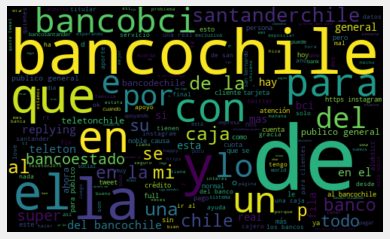

In [12]:
#POSITIVOS
allWordsp = " ".join( [tweets for tweets in df["TweetText"][ df["Analysis"] == 1]])
wordCloudp = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWordsp)

plt.imshow(wordCloudp, interpolation = "bilinear")
plt.axis("off")
plt.show()

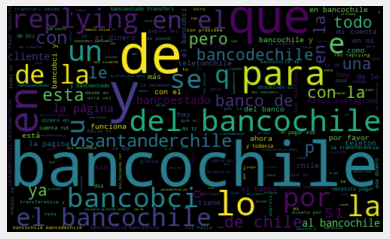

In [13]:
#NEUTROS
allWordsn = " ".join( [tweets for tweets in df["TweetText"][ df["Analysis"] == 0]])
wordCloudn = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWordsn)

plt.imshow(wordCloudn, interpolation = "bilinear")
plt.axis("off")
plt.show()

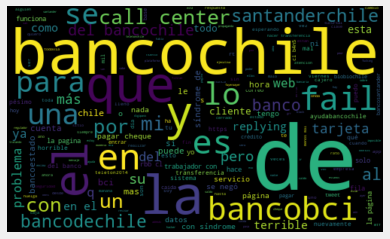

In [14]:
#NEGATIVOS
allWordsneg = " ".join( [tweets for tweets in df["TweetText"][ df["Analysis"] == -1]])
wordCloudneg = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWordsneg)

plt.imshow(wordCloudneg, interpolation = "bilinear")
plt.axis("off")
plt.show()

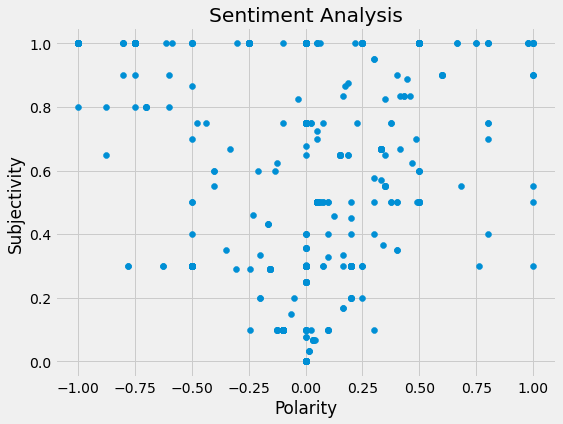

In [15]:
plt.figure(figsize = (8,6))
plt.scatter(df["Polarity"], df["Subjectivity"] )
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

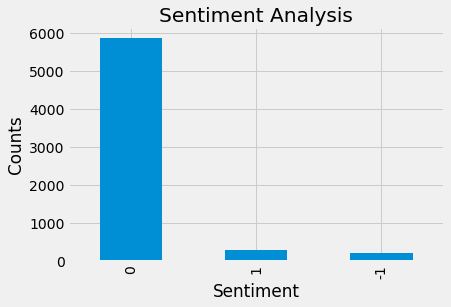

In [16]:

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = "bar")
plt.show()

**Clasificación por partes**: la idea es identifiar si se mencionan varios tipos de bancos, para poder determinar si el mensaje va dirigido a uno en particular o uno de preferencia e.g. banco A muy malo mejor voy a Banco C

In [17]:
#data =
datos = df.filter(['TweetText','BancoEstado','BancoChile', "BCI", "Santander"], axis=1)
datos

,TweetText,BancoEstado,BancoChile,BCI,Santander
0,"excelente, no lo sabia, pero no lo publicitan ...",-1,59,53,-1
1,"sres \n@bancoestado\n como no tener ""tino"", al...",7,-1,-1,152
2,"replying to \n@bancoestadochao #bancoestado, n...",14,-1,-1,-1
3,"muy cierto, algunos compatriotas dejan fluir s...",-1,155,-1,-1
4,utilidad pública.... ninguna institución banca...,168,-1,-1,157
...,...,...,...,...,...
6332,pagando un nic ... el webpay no me llevó al ba...,-1,119,-1,-1
6333,rt \n@juanpablotapia\n: sabía usté que el #ban...,-1,41,-1,-1
6334,nada más enredado que el #bancochile para abri...,-1,26,-1,-1
6335,peleando con #bancochile.... arghhh!,-1,14,-1,-1


In [18]:
# filtros
def reply(text):
    return text.replace("replying to \n", "Rto: ")

In [19]:
datos["TweetText"] = datos["TweetText"].apply(reply)

In [20]:
datos

,TweetText,BancoEstado,BancoChile,BCI,Santander
0,"excelente, no lo sabia, pero no lo publicitan ...",-1,59,53,-1
1,"sres \n@bancoestado\n como no tener ""tino"", al...",7,-1,-1,152
2,"Rto: @bancoestadochao #bancoestado, no voy a i...",14,-1,-1,-1
3,"muy cierto, algunos compatriotas dejan fluir s...",-1,155,-1,-1
4,utilidad pública.... ninguna institución banca...,168,-1,-1,157
...,...,...,...,...,...
6332,pagando un nic ... el webpay no me llevó al ba...,-1,119,-1,-1
6333,rt \n@juanpablotapia\n: sabía usté que el #ban...,-1,41,-1,-1
6334,nada más enredado que el #bancochile para abri...,-1,26,-1,-1
6335,peleando con #bancochile.... arghhh!,-1,14,-1,-1


In [21]:
print(datos["TweetText"][1])
print()
print(datos["TweetText"][4530])
print()
print(datos["TweetText"][277]) 

sres 
@bancoestado
 como no tener "tino", al pedir cambio de tarjeta.
a dios gracias no trabajo ni trabajare con su banco.
no hay como el 
@itauchile
 @santanderchile
 #bancoestado

por eso estoy en el bci y no en bancos mamones... #bancochile

una real callampa #bancoestado me voy a 
@santanderchile
 si o si


In [25]:
[df["Analysis"][1], df["Analysis"][4530], df["Analysis"][277]]

[0, 0, 1]

In [41]:
analysis = TextBlob("This table is black")
print(analysis.sentiment)
print(analysis.translate(to='es'))


Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)
Esta mesa es negra
